In [19]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [20]:
from pathlib import Path
import sys

def load_pexplorer():   
    link_path = "pexplorer"
    q = Path(link_path)
    while not q.exists():
        link_path = "../" + link_path
        q = Path(link_path)
        if len(link_path) > 500: raise Exception("Directory pexplorer not found.") 
    sys.path.append(link_path)
    import pexplorer as px
    return px

px = load_pexplorer()

In [76]:
df_c = pd.read_csv("train.csv")

In [77]:
test = pd.read_csv("test.csv")

In [78]:
sub = pd.read_csv("submission.csv")

In [79]:
test["Survived"] = sub.Survived

In [80]:
df = pd.concat([df_c, test], ignore_index=True)

In [81]:
px.col_rename(df, inplace=True)

In [82]:
df.head()

,passenger_id,survived,pclass,name,sex,age,sib_sp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [83]:
from sklearn.preprocessing import label_binarize

In [85]:
df["sex_n"] = label_binarize(df.sex, classes=["male", "female"])

In [91]:
len(df.ticket.unique())

929

In [94]:
df.groupby("ticket").name.count()

ticket
110152         3
110413         3
110465         2
110469         1
110489         1
              ..
W./C. 6608     5
W./C. 6609     1
W.E.P. 5734    2
W/C 14208      1
WE/P 5735      2
Name: name, Length: 929, dtype: int64

In [96]:
px.any_value(df, "W./C. 6608")

,passenger_id,survived,pclass,name,sex,age,sib_sp,parch,ticket,fare,cabin,embarked,sex_n
86,87,0,3,"Ford, Mr. William Neal",male,16.0,1,3,W./C. 6608,34.375,NaN,S,0
147,148,0,3,"Ford, Miss. Robina Maggie ""Ruby""",female,9.0,2,2,W./C. 6608,34.375,NaN,S,1
436,437,0,3,"Ford, Miss. Doolina Margaret ""Daisy""",female,21.0,2,2,W./C. 6608,34.375,NaN,S,1
736,737,0,3,"Ford, Mrs. Edward (Margaret Ann Watson)",female,48.0,1,3,W./C. 6608,34.375,NaN,S,1
1058,1059,0,3,"Ford, Mr. Edward Watson",male,18.0,2,2,W./C. 6608,34.375,NaN,S,0


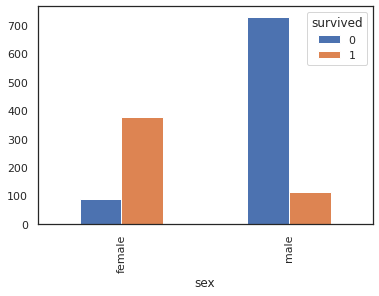

In [103]:
pd.crosstab(df.sex,df.survived).plot(kind='bar');

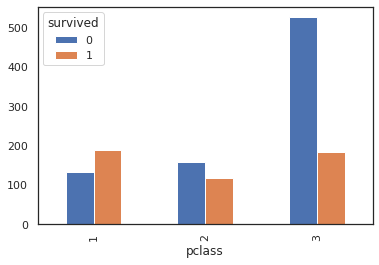

In [107]:
pd.crosstab(df.pclass,df.survived).plot(kind='bar');

In [109]:
from sklearn.preprocessing import add_dummy_feature

In [111]:
help(add_dummy_feature)

Help on function add_dummy_feature in module sklearn.preprocessing._data:

add_dummy_feature(X, value=1.0)
    Augment dataset with an additional dummy feature.
    
    This is useful for fitting an intercept term with implementations which
    cannot otherwise fit it directly.
    
    Parameters
    ----------
    X : {array-like, sparse matrix} of shape (n_samples, n_features)
        Data.
    
    value : float
        Value to use for the dummy feature.
    
    Returns
    -------
    X : {ndarray, sparse matrix} of shape (n_samples, n_features + 1)
        Same data with dummy feature added as first column.
    
    Examples
    --------
    >>> from sklearn.preprocessing import add_dummy_feature
    >>> add_dummy_feature([[0, 1], [1, 0]])
    array([[1., 0., 1.],
           [1., 1., 0.]])



In [121]:
dm = add_dummy_feature(df[["survived", "sex_n"]], value=33)

In [122]:
pd.DataFrame(dm)

,0,1,2
0,33.0,0.0,0.0
1,33.0,1.0,1.0
2,33.0,1.0,1.0
3,33.0,1.0,1.0
4,33.0,0.0,0.0
...,...,...,...
1304,33.0,0.0,0.0
1305,33.0,1.0,1.0
1306,33.0,0.0,0.0
1307,33.0,0.0,0.0


In [156]:
df

,passenger_id,survived,pclass,name,sex,age,sib_sp,parch,ticket,fare,cabin,embarked,sex_n,age_f
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,22
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,38
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,26
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,35
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,0,29
1305,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,1,39
1306,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0,38
1307,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,0,29


In [157]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.compose import make_column_selector

In [180]:
# create a dataframe with different data types
data = pd.DataFrame(
 {"gender": ["male", "female", "male", "male"],
 "age": [1565, 5, 11, 8]}
)
# create a column transformer with make_column_selector
ct = make_column_transformer(
 (StandardScaler(), make_column_selector(dtype_include=np.number)), # ages
 (OneHotEncoder(), make_column_selector(dtype_include=object)), # genders
)
transformed_data = ct.fit_transform(data)
transformed_data

array([[ 1.73204223,  0.        ,  1.        ],
       [-0.5817971 ,  1.        ,  0.        ],
       [-0.57289772,  0.        ,  1.        ],
       [-0.57734741,  0.        ,  1.        ]])

In [181]:
data

,gender,age
0,male,1565
1,female,5
2,male,11
3,male,8


In [183]:
pd.DataFrame(transformed_data)

,0,1,2
0,1.732042,0.0,1.0
1,-0.581797,1.0,0.0
2,-0.572898,0.0,1.0
3,-0.577347,0.0,1.0


In [208]:
df["pclass_"] = df.pclass.astype(str)
df["sib_sp_"] = df.pclass.astype(str)

In [211]:
df_c = df[["age_f", "pclass_", "sex", "sib_sp_"]]
transformed_data = ct.fit_transform(df_c)
df_m = pd.DataFrame(transformed_data)

In [213]:
df_m

,0,1,2,3,4,5,6,7,8
0,-0.595992,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,0.644809,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,-0.285792,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,0.412159,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,0.412159,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
1304,-0.053142,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1305,0.722359,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1306,0.644809,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1307,-0.053142,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


In [217]:
X = df_m.iloc[20:]
y = df.survived[20:]
x_test = df_m.iloc[:20]
y_test = df.survived[:20]

In [219]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(x_test)

In [228]:
dm_d = df.iloc[:20]

In [229]:
dm_d["Surv_"] = predictions

In [231]:
dm_d[["survived", "name", "Surv_"]]

,survived,name,Surv_
0,0,"Braund, Mr. Owen Harris",0
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1
2,1,"Heikkinen, Miss. Laina",1
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1
4,0,"Allen, Mr. William Henry",0
5,0,"Moran, Mr. James",0
6,0,"McCarthy, Mr. Timothy J",0
7,0,"Palsson, Master. Gosta Leonard",0
8,1,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1
9,1,"Nasser, Mrs. Nicholas (Adele Achem)",1
